# SCRAP AND CREATE THE DATAFRAME

In [1]:
import pandas as pd

# For performing your HTTP requests
import requests

# For XML & HTML scrapping
from bs4 import BeautifulSoup

In [2]:
url = "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969"

In [3]:
# Ping a website and return HTML of the website
website_url = requests.get(url).text

In [4]:
# Create a BS object with BS function. It is used to extract data from  HTML
soup = BeautifulSoup(website_url,'lxml')

In [5]:
# Get right table to scrap
My_table = soup.find('table',{'class':'wikitable sortable'})

In [6]:
# Get headers of the table
header = [th.text.rstrip() for th in My_table.find_all('th')]
print(header)
print('---------------')
print(len(header))

['Postal Code', 'Borough', 'Neighbourhood']
---------------
3


In [7]:
# Scrap the data and append to respective lists

c1=[]
c2=[]
c3=[]

for row in My_table.findAll("tr"):
    cells=row.findAll('td')
    if len(cells)==3: # Only extract body not heading
        c1.append(cells[0].find(text=True))
        c2.append(cells[1].find(text=True))
        c3.append(cells[2].find(text=True))

In [8]:
# Create a dictionary
d=dict([x,0] for x in header)
d

{'Postal Code': 0, 'Borough': 0, 'Neighbourhood': 0}

In [9]:
# Append dictionary with corresponding data list
d['Postal Code']=c1
d['Borough']=c2
d['Neighbourhood']=c3

In [10]:
# Convert dict to DataFrame
df_table=pd.DataFrame(d)

# Delete \n of the cells
df_table['Postal Code'] = df_table['Postal Code'].replace('\n','',regex=True)
df_table['Borough'] = df_table['Borough'].replace('\n','',regex=True)
df_table['Neighbourhood'] = df_table['Neighbourhood'].replace('\n','',regex=True)


# Top 5 records
df_table.head(5)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [11]:
df_table_1 = df_table.copy()

# Drop rows with not assigned borough
df_table_1.drop(df_table_1[df_table_1['Borough']=='Not assigned'].index,inplace=True)


In [12]:
df_table_1.head(5)

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [13]:
df_table_1[df_table_1['Neighbourhood']=='Not assigned'] # There are not Neigbourhood with Not assigned value

,Postal Code,Borough,Neighbourhood


In [14]:
# Neigbourhoods with the same Postal Code are alreday combined

In [15]:
df_table_1.reset_index(drop=True)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [16]:
df_table_1.shape

(103, 3)

# GET LOCATION DATA

In [17]:
#Import location data from csv file

df_data_1 = pd.read_csv('https://cocl.us/Geospatial_data')
df_data_1.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [18]:
df_data_1.shape

(103, 3)

In [19]:
# Merging two tables with data and location
df_data_merged = pd.merge(df_table_1,df_data_1)

In [20]:
df_data_merged.head(5)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [21]:
# Check
# df_data_merged[df_data_merged['Postal Code']=='M1R']

# EXPLORE AND CLUSTER

In [22]:
# Use data wich containt Toronto in its borough
df_data_toronto = df_data_merged[df_data_merged['Borough'].str.contains('Toronto',regex=False)]
df_data_toronto

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [23]:
# Visualize all Toronto's neighbourhoods using Folium

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # Plotting library

toronto_location = [43.651070,-79.347015]

# Create map
map_toronto = folium.Map(location=[toronto_location[0], toronto_location[1]], zoom_start=11)

# Add markers to the map
markers_colors = []
for lat, lon, borough, neighbourhood in zip(df_data_toronto['Latitude'], df_data_toronto['Longitude'], df_data_toronto['Borough'], df_data_toronto['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
       
map_toronto

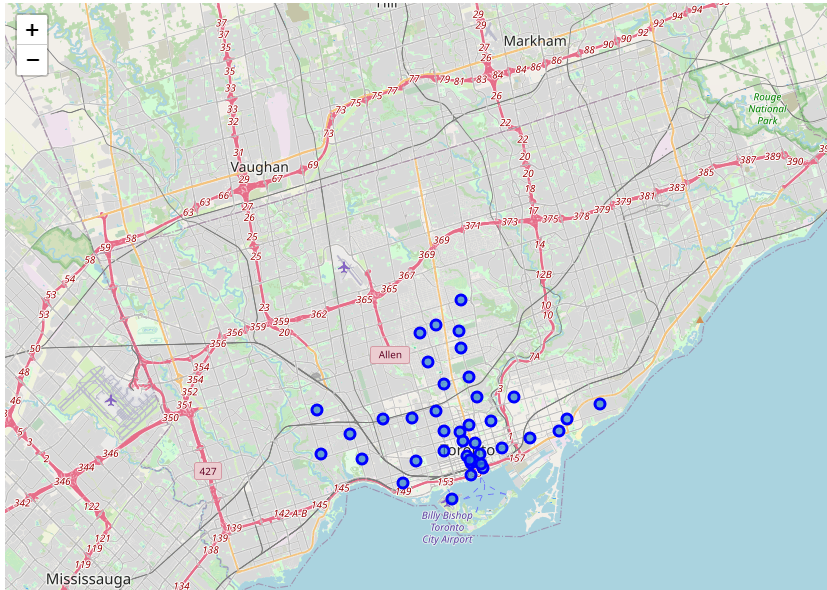

# Using Kmeans for clustering neighbourhoods

In [29]:
from sklearn.cluster import KMeans

# Set number of clusters
kclusters = 5

toronto_clustering = df_data_toronto.drop(['Postal Code','Borough','Neighbourhood'], 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 0, 0, 4, 0, 4], dtype=int32)

In [30]:
df_data_toronto.insert(0, 'Cluster Labels', kmeans.labels_)

In [31]:
df_data_toronto

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,0,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,0,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,2,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,4,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,0,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,4,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [35]:
# Create map

import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

toronto_location = [43.651070,-79.347015]

map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(df_data_toronto['Latitude'], df_data_toronto['Longitude'], df_data_toronto['Neighbourhood'], df_data_toronto['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

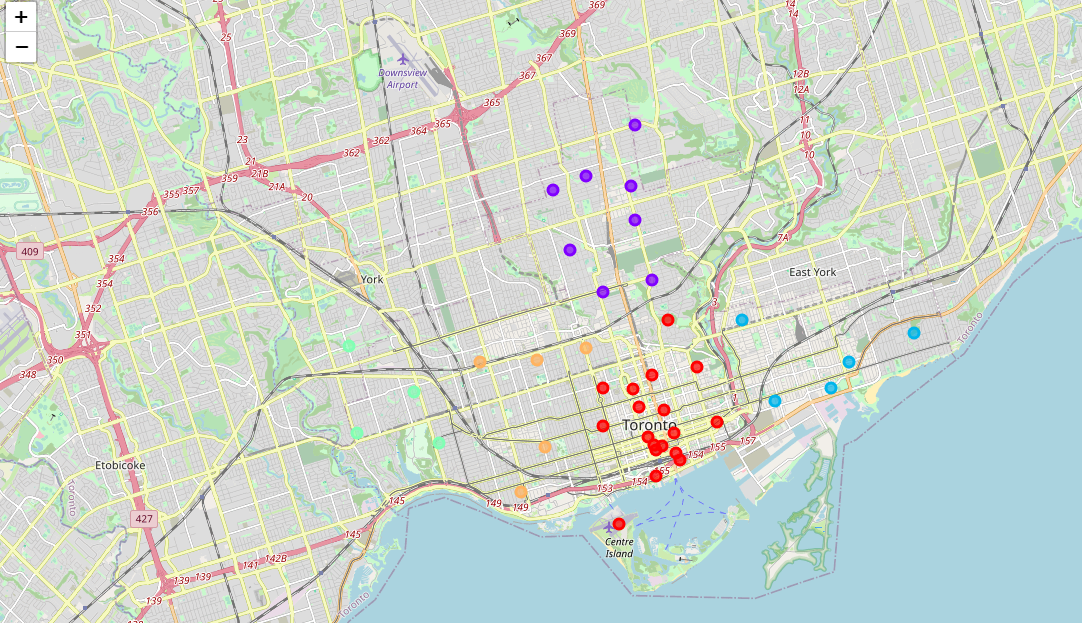